In [32]:
%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import pyfits as pf

In [33]:
A7 = pf.open('data/C7_0_0.fits')
x = np.genfromtxt('data/C7_0_0.zm')

In [34]:
A7[20].data.shape

(109L, 109L)

In [35]:
data = np.zeros([109,109,len(A7)])
for i in range(len(A7)):
    data[:, :, i] = A7[i].data

<IPython.core.display.Javascript object>


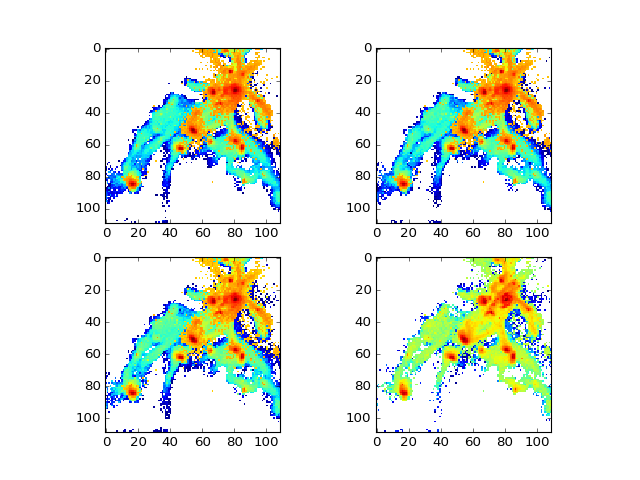

C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log10
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log10
C:\Users\sasha\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log10


In [55]:
plt.figure(1)
plt.subplot(221)
plt.imshow(np.log10(data[:,:,0]), interpolation='nearest')
plt.subplot(222)
plt.imshow(np.log10(data[:,:,150]), interpolation='nearest')
plt.subplot(223)
plt.imshow(np.log10(data[:,:,400]), interpolation='nearest')
plt.subplot(224)
plt.imshow(np.log10(data[:,:,-1]), interpolation='nearest')

<IPython.core.display.Javascript object>


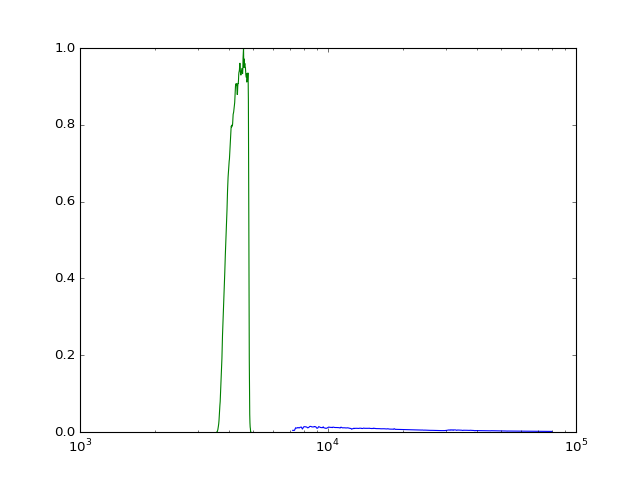

In [72]:
plt.figure(2)
c = 3e10
z = 7. 
plt.plot((1+z)*c/x[:,0]/1e-8, x[:,1]*x[:,0]/(1+z)/c/(6000e6/0.7/10)**2)
plt.xscale('log')

In [85]:
print np.trapz(x[:,1], x[:,0]) # *1e-23/(6000e6/0.7/10)**2
print np.trapz(x[:,1]*x[:,0]**2/c, c/x[:,0])

2.68649824266e+27
-2.68644723174e+27


In [146]:
filters_info = []
for line in open('data/FILTER.RES.latest.info', 'r'):
    filters_info.append(np.array(line.split()))
filters_info = np.array(filters_info)

temp_filters = open('data/FILTER.RES.latest', 'r')
filters = []
filters_names = []
first = True

for line in temp_filters:
    if line[0] == ' ':
        if not first:
            filters.append(np.array(temp))
        first = False
        filters_names.append(line.split())
        temp = []
        print line
    else:
        temp.append(np.array(line.split()).astype('float'))

filters = np.array(filters)

   133 hst/ACS_update_sep07/wfc_f435w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.3179e+03 AB-Vega=-0.104 w95=993.1

   121 hst/ACS_update_sep07/wfc_f475w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.7453e+03 AB-Vega=-0.101 w95=1412.8

   118 hst/ACS_update_sep07/wfc_f555w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.3601e+03 AB-Vega=-0.009 w95=1260.9

   173 hst/ACS_update_sep07/wfc_f606w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.9194e+03 AB-Vega= 0.082 w95=2225.4

    86 hst/ACS_update_sep07/wfc_f775w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 7.6933e+03 AB-Vega= 0.385 w95=1490.9

   117 hst/ACS_update_sep07/wfc_f814w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 8.0599e+03 AB-Vega= 0.419 w95=2359.0

   102 hst/ACS_update_sep07/wfc_f850lp_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 9.0364e+03 AB-Vega= 0.519 w95=2096.6

   193 hst/nicmos_f110w.dat synphot-calcband lambda_c= 1.1234e+04 AB-Vega= 0.725 w95=5536.9

   110 hst/nicmos_f160w.dat synphot-calcband lambda_c= 1.603

<IPython.core.display.Javascript object>


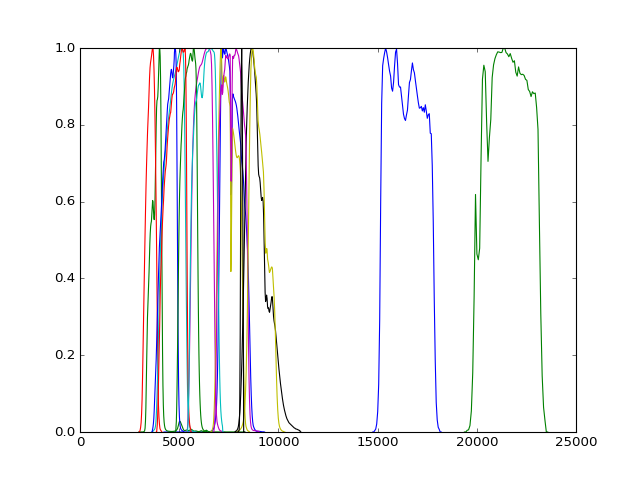

204
269
47
89
75
100
134
161
107
118
92
94
81
14
70
61


In [147]:
plt.figure(5)
for ifilt in range(len(filters_names)):
    if filters_names[ifilt][1][:3] == 'COS':
        print filters_names[ifilt][0]
        plt.plot(filters[ifilt][:,1], filters[ifilt][:,2])

In [138]:
filters_names = np.array(filters_names)
filters_names[np.array([a[0] for a in filters_names]).astype(int) == 236]

array([ ['236', 'musyc/B_1255_tot.dat', 'lambda_c=', '4.4186e+03', 'AB-Vega=-0.102', 'w95=1319.0'],
       ['236', 'hst/wfc3/IR/f098m.dat', 'calcband_wfc3-ir-f098m', 'lambda_c=', '9.8668e+03', 'AB-Vega=', '0.558', 'w95=1631.3']], dtype=object)

In [148]:
filters_info

array([ array(['1', 'hst/ACS_update_sep07/wfc_f435w_t77.dat',
       'obs_before_7-4-06+rebin-5A', 'lambda_c=', '4.3179e+03',
       'AB-Vega=-0.104', 'w95=993.1'], 
      dtype='|S38'),
       array(['2', 'hst/ACS_update_sep07/wfc_f475w_t77.dat',
       'obs_before_7-4-06+rebin-5A', 'lambda_c=', '4.7453e+03',
       'AB-Vega=-0.101', 'w95=1412.8'], 
      dtype='|S38'),
       array(['3', 'hst/ACS_update_sep07/wfc_f555w_t77.dat',
       'obs_before_7-4-06+rebin-5A', 'lambda_c=', '5.3601e+03',
       'AB-Vega=-0.009', 'w95=1260.9'], 
      dtype='|S38'),
       array(['4', 'hst/ACS_update_sep07/wfc_f606w_t77.dat',
       'obs_before_7-4-06+rebin-5A', 'lambda_c=', '5.9194e+03', 'AB-Vega=',
       '0.082', 'w95=2225.4'], 
      dtype='|S38'),
       array(['5', 'hst/ACS_update_sep07/wfc_f775w_t77.dat',
       'obs_before_7-4-06+rebin-5A', 'lambda_c=', '7.6933e+03', 'AB-Vega=',
       '0.385', 'w95=1490.9'], 
      dtype='|S38'),
       array(['6', 'hst/ACS_update_sep07/wfc_f814w_t77.dat'